# Market Basket Analysis in Python Using Apriori Algorithm

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('online_retail.csv',parse_dates=['InvoiceDate'])

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df.shape

(1067371, 8)

In [7]:
df=df.dropna()

In [8]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
df.shape

(824364, 8)

In [10]:
df['Description']=df['Description'].str.strip()

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
df.shape

(824364, 8)

In [13]:
df['Invoice'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
502263       1
C514528      1
546102       1
C546106      1
C494927      1
Name: Invoice, Length: 44876, dtype: int64

In [14]:
df['Invoice']=df['Invoice'].astype('str')
df=df[~df['Invoice'].str.contains('C')]

In [15]:
df.shape

(805620, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB


In [17]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Country'>

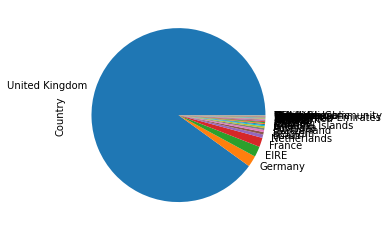

In [20]:
df['Country'].value_counts().plot(kind='pie')

<AxesSubplot:>

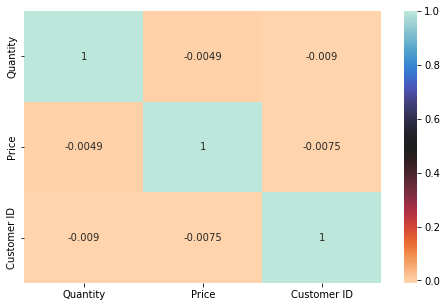

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='icefire_r',annot=True)

<AxesSubplot:>

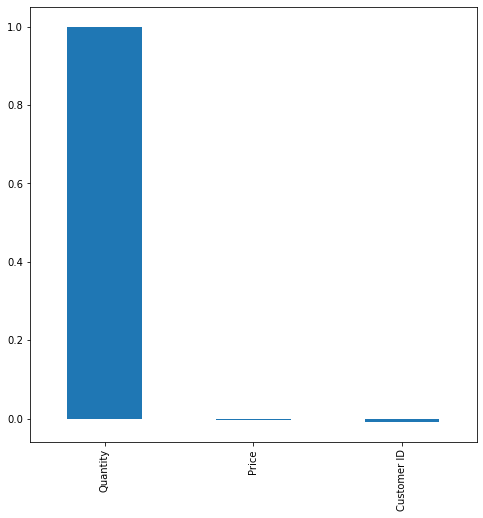

In [22]:
plt.figure(figsize=(8,8))
df.corr()['Quantity'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='Density'>

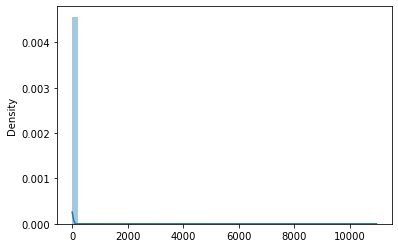

In [23]:
sns.distplot(x=df.Price)

# Analysis The Data Of The France

In [24]:
basket = (df[df['Country'] =="France"]       
          .groupby(['Invoice', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Invoice')) 

In [25]:
basket.shape

(614, 2177)

In [26]:
basket.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.625407,0.195440,0.003257,0.001629,0.061889,0.750814,0.039088,0.359935,0.312704,0.291531,...,0.006515,0.006515,0.003257,0.052117,0.175896,0.008143,0.065147,0.019544,0.039088,0.039088
std,4.503369,1.968988,0.080713,0.040357,0.841082,5.348366,0.968561,2.892713,2.723818,2.910524,...,0.161427,0.161427,0.057026,1.291415,1.868867,0.201784,0.852397,0.484281,0.684317,0.684317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,1.000000,12.000000,96.000000,24.000000,24.000000,24.000000,48.000000,...,4.000000,4.000000,1.000000,32.000000,36.000000,5.000000,12.000000,12.000000,12.000000,12.000000


In [27]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 489439 to 581587
Columns: 2177 entries, 10 COLOUR SPACEBOY PEN to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: float64(2177)
memory usage: 10.2+ MB


In [28]:
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [30]:
basket_sets.head()


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Apriori Algorithm

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)


C:\Users\shiny\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ASSORTED COLOUR MINI CASES),(POSTAGE),0.084691,0.758958,0.079805,0.942308,1.241581,0.015528,4.178067,0.212579
1,(POSTAGE),(ASSORTED COLOUR MINI CASES),0.758958,0.084691,0.079805,0.105150,1.241581,0.015528,1.022864,0.807226
2,(CIRCUS PARADE LUNCH BOX),(POSTAGE),0.087948,0.758958,0.071661,0.814815,1.073597,0.004913,1.301629,0.075162
3,(POSTAGE),(CIRCUS PARADE LUNCH BOX),0.758958,0.087948,0.071661,0.094421,1.073597,0.004913,1.007148,0.284398
4,(DOLLY GIRL LUNCH BOX),(POSTAGE),0.096091,0.758958,0.073290,0.762712,1.004947,0.000361,1.015821,0.005445


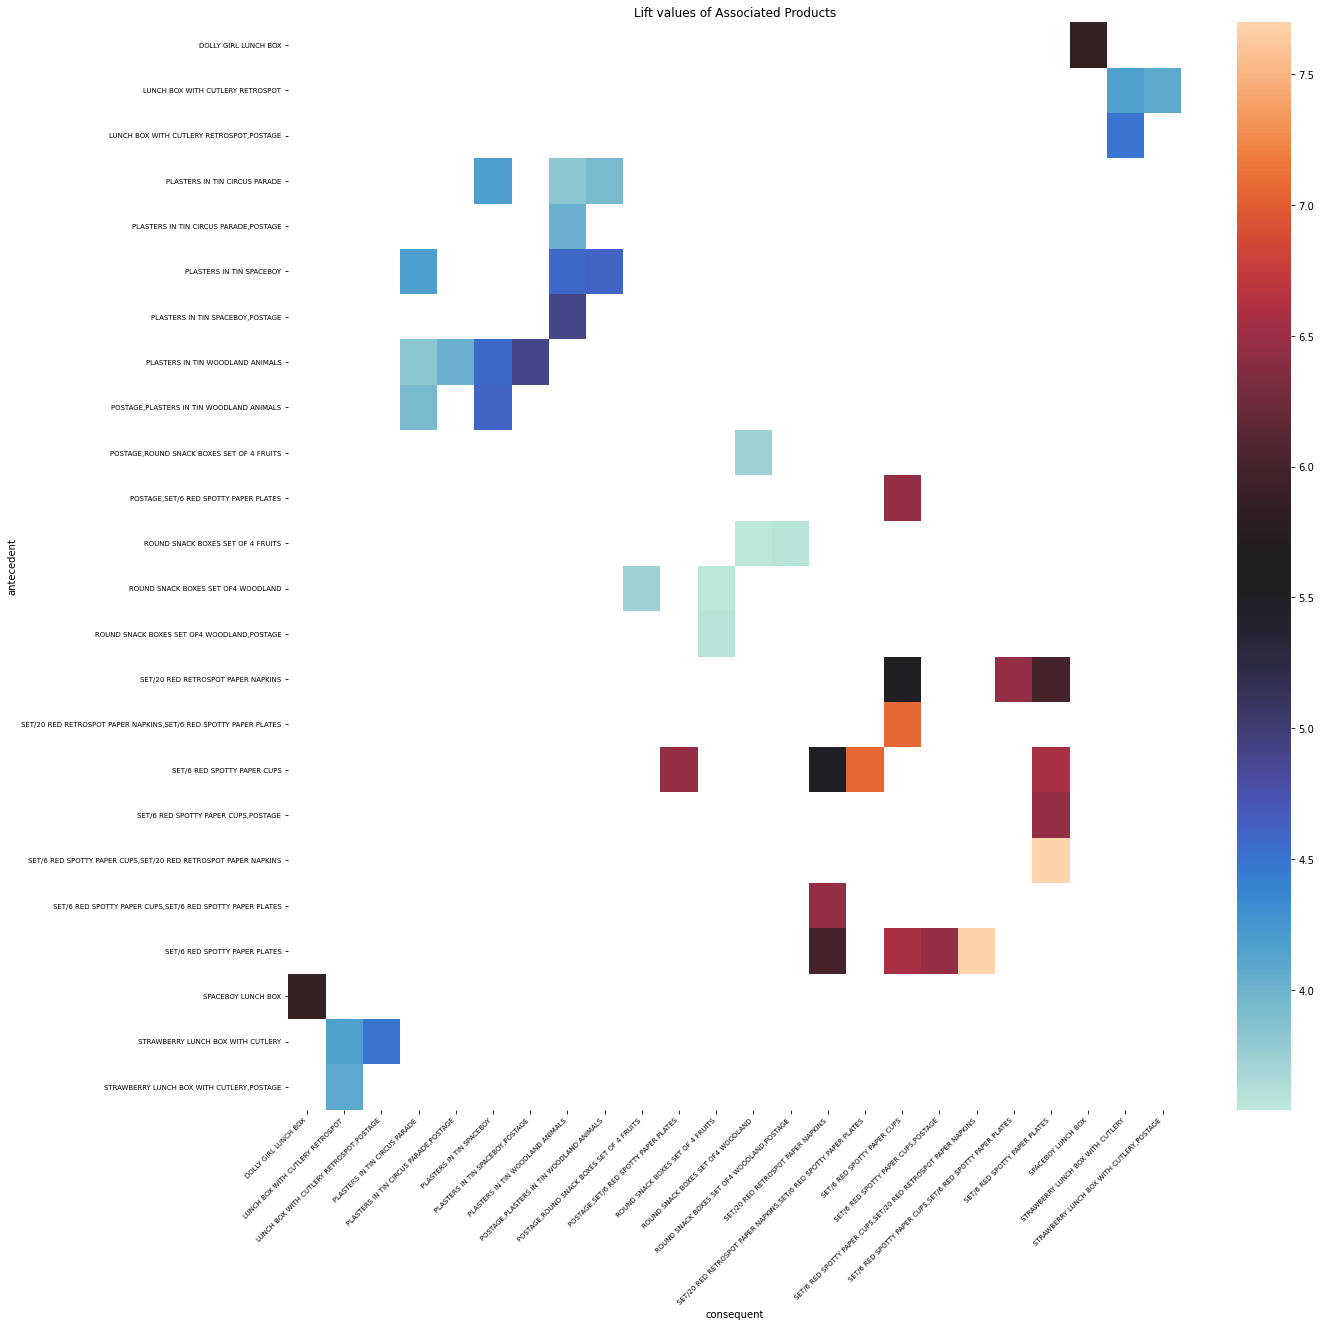

In [34]:
rules['antecedents_Heat'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_Heat'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(rules[(rules['lift']>=1.5) & (rules['confidence']>=0.3)].pivot(index='consequents_Heat', columns = 'antecedents_Heat', values = 'lift'),
            cmap = 'icefire',
            ax = ax)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7, rotation = 45, ha = 'right')
plt.ylabel('antecedent')
plt.xlabel('consequent')
plt.title('Lift values of Associated Products')
plt.show()

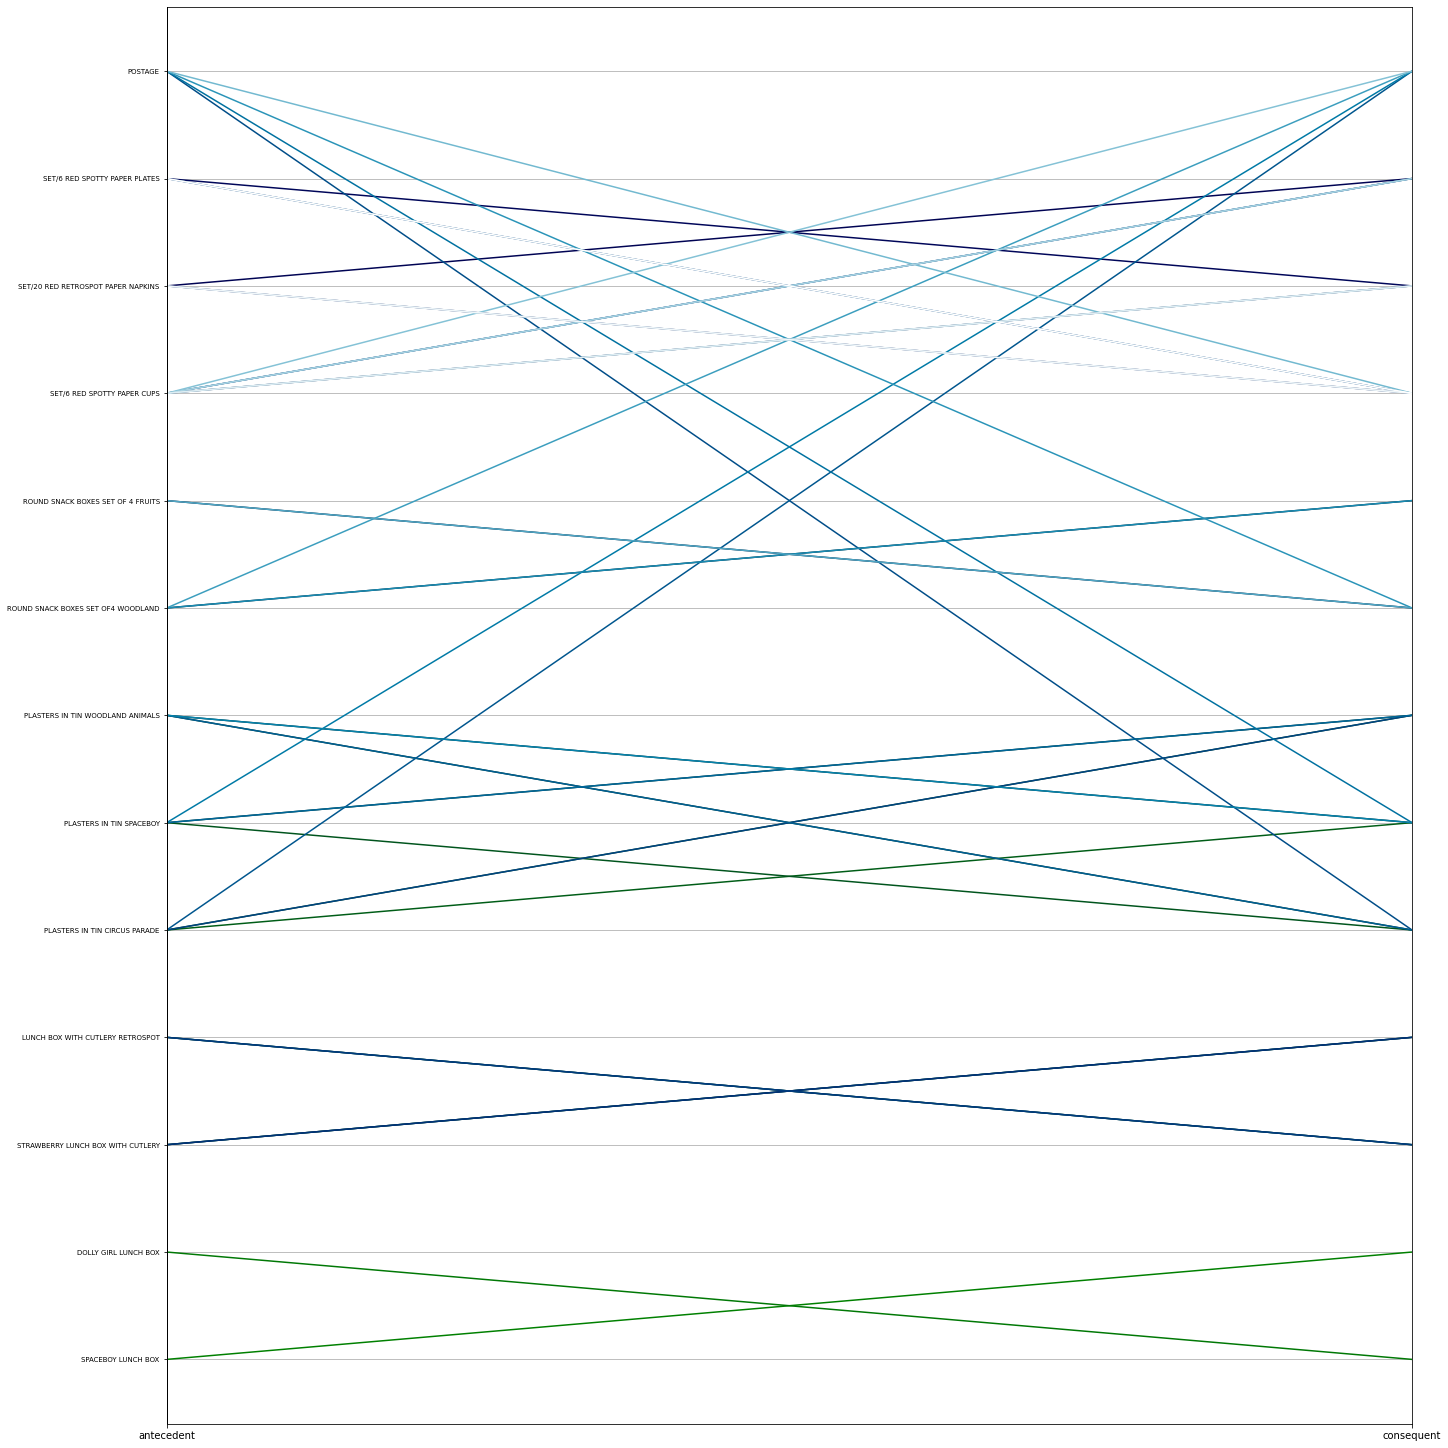

In [35]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

coords = rules.loc[(rules['lift']>=1.5) & (rules['confidence']>=0.3),['antecedent','consequent','rule']]
coords.columns = ['antecedent', 'consequent','rule']

fig, ax = plt.subplots(constrained_layout=True,figsize = (20,20))
pd.plotting.parallel_coordinates(coords,'rule',colormap = 'ocean', ax = ax)
ax.get_legend().remove()
plt.yticks(fontsize = 7)
plt.show()

In [36]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_Heat,consequents_Heat,antecedent,consequent,rule
66,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138436,0.127036,0.115635,0.835294,6.575264,0.098049,5.300140,0.984158,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,66
67,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127036,0.138436,0.115635,0.910256,6.575264,0.098049,9.600279,0.971305,SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,67
92,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",(SET/6 RED SPOTTY PAPER PLATES),0.117264,0.127036,0.096091,0.819444,6.450499,0.081194,4.834878,0.957221,"SET/6 RED SPOTTY PAPER CUPS,POSTAGE",SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,92
94,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.107492,0.138436,0.096091,0.893939,6.457398,0.081210,8.123313,0.946926,"POSTAGE,SET/6 RED SPOTTY PAPER PLATES",SET/6 RED SPOTTY PAPER CUPS,POSTAGE,SET/6 RED SPOTTY PAPER CUPS,94
98,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.073290,0.127036,0.071661,0.977778,7.696866,0.062351,39.283388,0.938888,"SET/6 RED SPOTTY PAPER CUPS,SET/20 RED RETROSP...",SET/6 RED SPOTTY PAPER PLATES,SET/6 RED SPOTTY PAPER CUPS,SET/6 RED SPOTTY PAPER PLATES,98
100,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.073290,0.138436,0.071661,0.977778,7.063007,0.061515,38.770358,0.926306,"SET/20 RED RETROSPOT PAPER NAPKINS,SET/6 RED S...",SET/6 RED SPOTTY PAPER CUPS,SET/20 RED RETROSPOT PAPER NAPKINS,SET/6 RED SPOTTY PAPER CUPS,100


# Conclusion

In looking at the rules, it seems that the RED SPOTTY PAPER PLATES and RED SPOTTY PAPER CUPS are purchased together and the RED SPOTTY PAPER PLATES and POSTAGE are purchased together in a manner that is higher than the overall probability would suggest.
